In [1]:
import sys
sys.path.append('/home/ego/Github/david/')

from david.pipeline import TextPipeline
from david.models import ngrams, lda
from david.visualizers.words import build_wordcloud

from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [2]:
JSONFILE = 'downloads/BmYZH7xt8sU.json'
tp = TextPipeline(JSONFILE)
tp.info()

<class 'david.pipeline.TextPipeline'>
RangeIndex: 4252 entries, 0 to 4251
Data columns (total 4 columns):
author    4252 non-null object
cid       4252 non-null object
text      4252 non-null object
time      4252 non-null object
dtypes: object(4)
memory usage: 133.0+ KB


In [3]:
tp.get_all_metrics(sentiment=True, tags=True)
tp.describe()

,stringLength,avgWordLength,isStopwordCount,noStopwordCount,charDigitCount,charUpperCount,charLowerCount,sentiPolarity,sentiSubjectivity
count,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000
mean,135.003998,4.739630,26.677328,14.556914,0.375118,3.729774,101.602305,0.152794,0.435873
std,153.628255,0.969159,29.328706,15.255229,1.159446,5.685900,116.379166,0.264156,0.303939
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,51.000000,4.200000,10.000000,6.000000,0.000000,1.000000,38.000000,0.000000,0.125000
50%,95.000000,4.703203,19.000000,10.000000,0.000000,2.000000,72.000000,0.100000,0.500000
75%,170.000000,5.200000,34.000000,18.000000,0.000000,4.000000,128.000000,0.322247,0.650000
max,3240.000000,18.000000,592.000000,297.000000,18.000000,118.000000,2477.000000,1.000000,1.000000


In [4]:
tp2 = tp.slice_dataframe(by_min_value=10)
tp2.describe()

,stringLength,avgWordLength,isStopwordCount,noStopwordCount,charDigitCount,charUpperCount,charLowerCount,sentiPolarity,sentiSubjectivity
count,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000
mean,138.241080,4.755161,27.311475,14.891273,0.382835,3.803279,104.042671,0.154561,0.442759
std,154.158529,0.935937,29.415853,15.296428,1.171980,5.736339,116.790765,0.265140,0.301906
min,11.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,54.000000,4.222222,11.000000,6.000000,0.000000,1.000000,40.000000,0.000000,0.200000
50%,98.000000,4.721576,20.000000,11.000000,0.000000,2.000000,74.000000,0.107143,0.500000
75%,173.000000,5.200000,34.000000,18.000000,0.000000,5.000000,130.000000,0.325000,0.650000
max,3240.000000,18.000000,592.000000,297.000000,18.000000,118.000000,2477.000000,1.000000,1.000000


In [5]:
tp.clean_all_text(lemmatize=True, lower_texts=True)
tp.get_all_metrics(sentiment=True)
tp.describe()

,stringLength,avgWordLength,isStopwordCount,noStopwordCount,charDigitCount,charUpperCount,charLowerCount,sentiPolarity,sentiSubjectivity
count,4252.000000,4252.000000,4252.000000,4252.000000,4252.0,4252.0,4252.000000,4252.000000,4252.000000
mean,129.674036,4.839777,27.099483,11.924036,0.0,0.0,103.573142,0.148615,0.432244
std,147.282336,1.002277,29.948206,12.841583,0.0,0.0,117.455428,0.256712,0.302043
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-1.000000,0.000000
25%,49.000000,4.356092,10.000000,5.000000,0.0,0.0,39.000000,0.000000,0.125000
50%,92.000000,4.833333,19.000000,9.000000,0.0,0.0,73.500000,0.100000,0.500000
75%,163.000000,5.333333,34.000000,15.000000,0.0,0.0,130.000000,0.311218,0.648363
max,3105.000000,18.000000,601.000000,244.000000,0.0,0.0,2505.000000,1.000000,1.000000


In [6]:
tp2 = tp.slice_dataframe(by_min_value=10)
tp2.text.head()

0           i always forget to like the vid remind u p
1    looked like there wa oil coming down left side...
2      i like video if it something really fuckin cool
3    pos cable to small of guage causing currant surge
4    gt rs one of the best track car ever made yet ...
Name: text, dtype: object

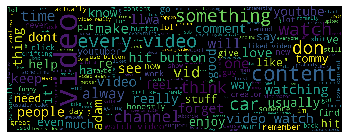

In [7]:
build_wordcloud(tp2.text.values.tolist(), img_name='yt_wordcloud')

In [8]:
import pandas as pd

def build_set_from_corpus(df, text_col, stop_words: set, n_words=20):
    # I need to add this method to
    # the library, I just need a better name.
    common = pd.Series(' '.join(
        df[text_col]).lower().split()).value_counts()[:n_words]
    uncommon = pd.Series(' '.join(
        df[text_col]).lower().split()).value_counts()[-n_words:]
    # adds common neg|pos words to a existing stop_word set
    stop_words = set(stop_words)
    stop_words = stop_words.union(list(common.keys()))
    stop_words = stop_words.union(list(uncommon.keys()))
    return stop_words

In [9]:
stop_words = build_set_from_corpus(tp2, text_col='text',
                                   stop_words=ngrams.STOP_WORDS,
                                   n_words=20)

tp2_texts = tp2.text.values.tolist()
corpus = ngrams.text2ngrams(sentences=tp2_texts,
                            stop_words=stop_words,
                            threshold=10.0)

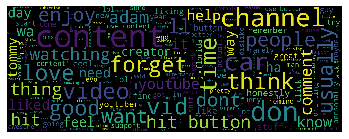

In [19]:
# theres a difference when using the built stop_word set!
build_wordcloud(tp2.text.values.tolist(),
                img_name='wordcloud_corpus_stopwords',
                stop_words=stop_words)

In [10]:
ngrams.top_unigrams(tp2_texts, n=10)

[('like', 5091),
 ('the', 4586),
 ('video', 3674),
 ('to', 3167),
 ('it', 2653),
 ('you', 2280),
 ('and', 2203),
 ('of', 1399),
 ('your', 1380),
 ('that', 1380)]

In [11]:
ngrams.top_bigrams(tp2_texts, n=10)

[('the video', 757),
 ('like video', 671),
 ('the like', 544),
 ('to like', 536),
 ('like the', 475),
 ('like button', 463),
 ('every video', 457),
 ('your video', 424),
 ('of the', 350),
 ('like every', 349)]

In [12]:
ngrams.top_trigrams(tp2_texts, n=10)

[('the like button', 417),
 ('like every video', 291),
 ('like the video', 287),
 ('hit the like', 258),
 ('forget to like', 179),
 ('every video watch', 125),
 ('only like video', 124),
 ('like video when', 117),
 ('like video if', 100),
 ('to like video', 97)]

In [13]:
ngrams.top_quadgrams(tp2_texts, n=10)

[('hit the like button', 212),
 ('like every video watch', 104),
 ('to hit the like', 70),
 ('use the like button', 65),
 ('to like the video', 65),
 ('keep up the good', 50),
 ('just forget to like', 50),
 ('up the good work', 43),
 ('only like video when', 42),
 ('out of the water', 42)]

In [14]:
from pprint import pprint

def build_lda_model(sentences, topics=3, return_doc2bow=False):
    id2word = corpora.Dictionary(sentences)
    doc2bow = [id2word.doc2bow(text) for text in sentences]
    ldamodel = LdaModel(corpus=doc2bow, id2word=id2word,
                        num_topics=topics, random_state=100,
                        update_every=1, chunksize=1000,
                        passes=10, alpha='symmetric',
                        iterations=50, per_word_topics=True
                       )
    if return_doc2bow:
        return (ldamodel, doc2bow)
    else:
        return ldamodel

lda_model, doc2bow = build_lda_model(corpus, topics=5, return_doc2bow=True)

In [15]:
pprint(lda_model.print_topics())

[(0,
  '0.064*"content" + 0.044*"car" + 0.043*"love" + 0.021*"good" + 0.016*"year" '
  '+ 0.016*"work" + 0.013*"man" + 0.013*"day" + 0.013*"florida" + 0.012*"vid"'),
 (1,
  '0.036*"forget" + 0.029*"vid" + 0.022*"think" + 0.018*"comment" + '
  '0.017*"usually" + 0.016*"don" + 0.016*"happen" + 0.015*"help" + '
  '0.015*"honestly" + 0.014*"creator"'),
 (2,
  '0.032*"channel" + 0.024*"content" + 0.023*"enjoy" + 0.018*"car" + '
  '0.014*"doesn" + 0.013*"matter" + 0.012*"time" + 0.012*"subscribe" + '
  '0.011*"know" + 0.011*"hope"'),
 (3,
  '0.056*"hit" + 0.056*"button" + 0.016*"channel" + 0.016*"think" + '
  '0.016*"blow" + 0.016*"forget" + 0.015*"ask" + 0.015*"remember" + '
  '0.013*"people" + 0.013*"use"'),
 (4,
  '0.035*"tommy" + 0.013*"guy" + 0.012*"simple" + 0.011*"tell" + '
  '0.011*"ground" + 0.011*"sell" + 0.010*"didn" + 0.010*"happy" + 0.010*"lz" + '
  '0.009*"head"')]


In [16]:
tp2_topics = lda.build_topics(LDA_model=lda_model, Gensim_doc2bow=doc2bow,
                              corpus=corpus, num_topics=5, reset_col_names=True)

In [17]:
tp2_topics.head()

,topicId,dominantTopic,topicContribution,topicKeywords,topicTokens
0,0,1.0,0.79933,"forget, vid, think, comment, usually, don, hap...","[forget, vid, remind]"
1,1,4.0,0.49964,"tommy, guy, simple, tell, ground, sell, didn, ...","[look, oil, come, leave, dad, engine, block]"
2,2,2.0,0.59665,"channel, content, enjoy, car, doesn, matter, t...",[cool]
3,3,1.0,0.72637,"forget, vid, think, comment, usually, don, hap...","[pos, cable, small, guage, cause, currant, surge]"
4,4,2.0,0.95505,"channel, content, enjoy, car, doesn, matter, t...","[rs, good, track, car, porsche, cup, holder, c..."


In [21]:
tp2_topics.topicKeywords.describe()

count                                                  4132
unique                                                    5
top       content, car, love, good, year, work, man, day...
freq                                                   1137
Name: topicKeywords, dtype: object

In [24]:
from multiprocessing import cpu_count

import pyLDAvis
import pyLDAvis.gensim
from gensim.models import Word2Vec

In [44]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc2bow, dictionary=lda_model.id2word)
pyLDAvis.save_html(vis, 'yt_test.html')

/home/ego/anaconda3/envs/vuepoint/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [64]:
model = Word2Vec(size=50, window=5, min_count=5, alpha=0.025,
                 sample=0.001, seed=1, negative=10, cbow_mean=1,
                 workers=cpu_count(), sg=1, hs=0, iter=5)

model.build_vocab(corpus)
print(f'model vocab size: {len(model.wv.vocab)}')
model.train(corpus, total_examples=len(corpus), epochs=400)

W0904 09:46:44.616429 140030239422272 base_any2vec.py:723] consider setting layer size to a multiple of 4 for greater performance


model vocab size: 856


(8262953, 13029200)

In [65]:
model.wv.most_similar('channel', topn=20)

[('time', 0.7717297673225403),
 ('people', 0.7227359414100647),
 ('content', 0.7209324836730957),
 ('good', 0.7142516374588013),
 ('subscribe', 0.7129594087600708),
 ('don', 0.7066236734390259),
 ('support', 0.7048803567886353),
 ('think', 0.6856714487075806),
 ('enjoy', 0.6822136044502258),
 ('creator', 0.6752663850784302),
 ('youtuber', 0.6723272800445557),
 ('know', 0.6660952568054199),
 ('start', 0.6556217670440674),
 ('vid', 0.655336320400238),
 ('hit', 0.6549896001815796),
 ('forget', 0.6427695751190186),
 ('year', 0.6336346864700317),
 ('click', 0.6334744095802307),
 ('love', 0.6264768242835999),
 ('comment', 0.6205865144729614)]

In [66]:
model.wv.most_similar('background', topn=20)

[('noise', 0.5782352089881897),
 ('polyphia', 0.5616501569747925),
 ('bet', 0.505351722240448),
 ('exceptionally', 0.5047679543495178),
 ('edit', 0.4767282009124756),
 ('performance', 0.47365930676460266),
 ('case', 0.4522467851638794),
 ('doubt', 0.4407612979412079),
 ('sandwich', 0.43483272194862366),
 ('eye', 0.42800840735435486),
 ('majority', 0.4220414459705353),
 ('tommys', 0.42083171010017395),
 ('fast', 0.4160884618759155),
 ('single', 0.4149792194366455),
 ('dislike', 0.4131980240345001),
 ('pan', 0.4088815152645111),
 ('screen', 0.40250322222709656),
 ('hear', 0.40036070346832275),
 ('shot', 0.39929524064064026),
 ('thumb', 0.39868128299713135)]

In [72]:
model.wv.most_similar('want', topn=20)

[('don', 0.6857895255088806),
 ('know', 0.6725720167160034),
 ('time', 0.6631420850753784),
 ('use', 0.6609086394309998),
 ('way', 0.6509333848953247),
 ('think', 0.6502123475074768),
 ('comment', 0.6334865093231201),
 ('people', 0.6306197643280029),
 ('content', 0.6206315159797668),
 ('thing', 0.6142355799674988),
 ('come', 0.6069813370704651),
 ('find', 0.6056879758834839),
 ('good', 0.6020851731300354),
 ('later', 0.6008220911026001),
 ('love', 0.5994978547096252),
 ('enjoy', 0.5973695516586304),
 ('help', 0.5912057161331177),
 ('channel', 0.5838154554367065),
 ('usually', 0.5827153921127319),
 ('need', 0.5734660029411316)]